# libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dataset_path = '/content/gdrive/MyDrive/chosen_car_dataset'
testset_path = '/content/gdrive/MyDrive/testset'
# the datasets are downloaded by crawling using icrawler framework and google and bing crawlers.
# the outliers are hand picked and removed from the dataset and left with less than half the number of images than before(raw downloaded files were 3800 images in total)
# the minimum number of images between each class was 139 so the first 139 data in other folders were selected and pasted in a saparate folder and then uploaded to the drive.
# could be handled automatically but due to slow upload pace, we decided to go with the manual solution.

Mounted at /content/gdrive


# fetch data and preprocess

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.15,
  subset="training",
  label_mode='categorical', # this prevents the data to have sequential order within unlike integer labels.
  shuffle=True,
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# topic to change: aspect ratio

Found 834 files belonging to 6 classes.
Using 709 files for training.


## split the train and test set.

In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.15,
  subset="validation",
  label_mode='categorical', # this prevents the data to have sequential order within unlike integer labels.
  shuffle=True,
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# topic to change: aspect ratio

Found 834 files belonging to 6 classes.
Using 125 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
for images, labels in train_ds.take(1):
  print(labels)

['dena', 'peugeot206', 'peugeotpars', 'saipapride', 'samand', 'tiba']
tf.Tensor(
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]], shape=(32, 6), dtype=float32)


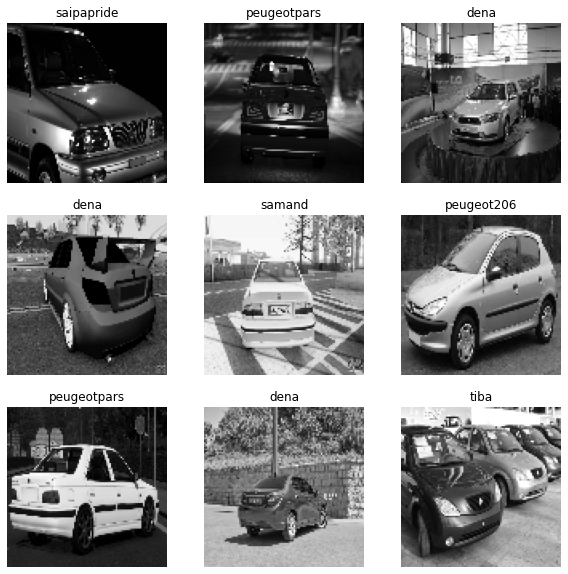

In [ ]:
# here is a sample showing how our data looks like.

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i][:,:,0].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

## more optimization on the memory handling of the train and validation sets.

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## alternative solutions that got replaced

In [ ]:
# ### alternative solutions that should be hand tested.

# def preprocess_image2(path):
#   #we shall store all the file names in this list
#   filelist = []

#   for root, dirs, files in os.walk(path):
#     for file in files:
#           #append the file name to the list
#       filelist.append(os.path.join(root,file))
#   images = []
#   #print all the file names
#   for filename in filelist:
#       images.append(
#           image.load_img(filename, target_size=(100,100)))
#   return images

In [ ]:
# def preprocess_image(path):
#   #we shall store all the file names in this list
#   filelist = []
#   for root, dirs, files in os.walk(path):
#     for file in files:
#           #append the file name to the list
#       filelist.append(os.path.join(root,file))

#   images = []
#   #print all the file names
#   for filename in filelist:
#       images.append(
#           image.load_img(filename, target_size=(100,100), color_mode='grayscale'))
#   return images

In [ ]:
# unused code for now.
# path = dataset_path+'/tiba+car/'
# # read from drive and extract the images.
# tiba_images = preprocess_image(path)

# path = dataset_path+'/saipa+pride+car/'
# # read from drive and extract the images.
# pride_images = preprocess_image(path)

# path = dataset_path+'/dena+car/'
# # read from drive and extract the images.
# dena_images = preprocess_image(path)

# path = dataset_path+'/peugeot+pars+car/'
# # read from drive and extract the images.
# pegopars_images = preprocess_image(path)

# path = dataset_path+'/peugeot+206+car/'
# # read from drive and extract the images.
# pego206_images = preprocess_image(path)

# path = dataset_path+'/samand+car/'
# # read from drive and extract the images.
# samand_images = preprocess_image(path)

In [ ]:
# not used code rn

# filename = '000001.jpg'
# file_number = 0
# while(os.path.exists(foldername+filename)):

#   file_number += 1
#   if(file_number < 10):
#     filename = '00000' + file_number + '.jpg'
#   elif(file_number < 100):
#     filename = '0000' + file_number + '.jpg'
#   elif(file_number < 1000):
#     filename = '000' + file_number + '.jpg'
#   elif(file_number==1000):
#     filename = '00' + file_number + '.jpg'

# The Modeling

# defining the model A

In [ ]:
# locally connected convolutions feature extractors.
modelA = models.Sequential()
modelA.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 1))) # grayscale, change to 3 for RGB.
modelA.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully connected layers
modelA.add(layers.Flatten()) # 3D tensor to 1D vector.
modelA.add(layers.Dense(64, activation='relu')) # hidden layer with fully connect neurons.
modelA.add(layers.Dense(len(train_ds.class_names)))
# output layer which indicates the number of classes.

modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        3

## model compile and build

In [ ]:
modelA.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train and validate model

In [ ]:
epochs=13

historyA = modelA.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/13
23/23 [==============================] - 28s 1s/step - loss: 1.8182 - accuracy: 0.1566 - val_loss: 1.7919 - val_accuracy: 0.1840
Epoch 2/13
23/23 [==============================] - 15s 557ms/step - loss: 1.7944 - accuracy: 0.1890 - val_loss: 1.7938 - val_accuracy: 0.1920
Epoch 3/13
23/23 [==============================] - 15s 569ms/step - loss: 1.7806 - accuracy: 0.2087 - val_loss: 1.7572 - val_accuracy: 0.2640
Epoch 4/13
23/23 [==============================] - 14s 555ms/step - loss: 1.7560 - accuracy: 0.2412 - val_loss: 1.7607 - val_accuracy: 0.2560
Epoch 5/13
23/23 [==============================] - 15s 557ms/step - loss: 1.6057 - accuracy: 0.3272 - val_loss: 1.8761 - val_accuracy: 0.2000
Epoch 6/13
23/23 [==============================] - 15s 562ms/step - loss: 1.3691 - accuracy: 0.4880 - val_loss: 1.8658 - val_accuracy: 0.2560
Epoch 7/13
23/23 [==============================] - 16s 628ms/step - loss: 1.0599 - accuracy: 0.6234 - val_loss: 2.2849 - val_accuracy: 0.2960
Ep

## the graphs

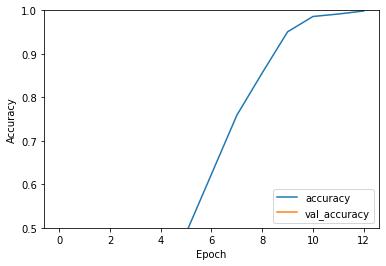

In [ ]:
plt.figure()
plt.plot(historyA.history['accuracy'], label='accuracy')
plt.plot(historyA.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

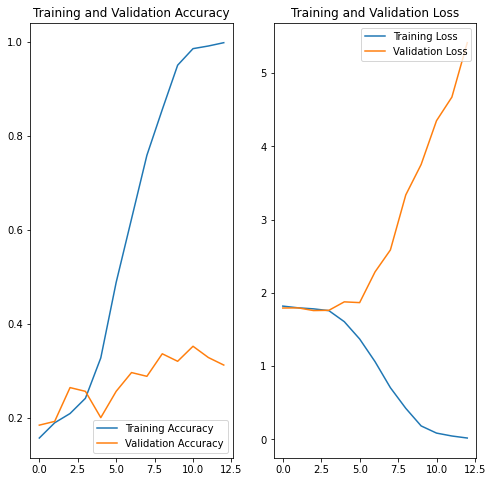

In [ ]:
acc_A = historyA.history['accuracy']
val_acc_A = historyA.history['val_accuracy']

loss_A = historyA.history['loss']
val_loss_A = historyA.history['val_loss']

epochs_range_A = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_A, acc_A, label='Training Accuracy')
plt.plot(epochs_range_A, val_acc_A, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_A, loss_A, label='Training Loss')
plt.plot(epochs_range_A, val_loss_A, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# defining the model B

In [ ]:
# locally connected convolutions feature extractors.
modelB = models.Sequential()
modelB.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 1))) # grayscale, change to 3 for RGB.
modelB.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((2, 2)))
modelB.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((2, 2)))
modelB.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully connected layers
modelB.add(layers.Flatten()) # 3D tensor to 1D vector.
modelB.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons.
modelB.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons. adding another layer to produce more complexity to the model.
modelB.add(layers.Dense(len(train_ds.class_names)))
# output layer which indicates the number of classes.

modelB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)       

## model compile and build

In [ ]:
modelB.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train and validate model

In [ ]:
epochs=13

historyB = modelB.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/13
23/23 [==============================] - 16s 580ms/step - loss: 1.8178 - accuracy: 0.1481 - val_loss: 1.7925 - val_accuracy: 0.1360
Epoch 2/13
23/23 [==============================] - 15s 571ms/step - loss: 1.7896 - accuracy: 0.2257 - val_loss: 1.7628 - val_accuracy: 0.2000
Epoch 3/13
23/23 [==============================] - 15s 588ms/step - loss: 1.7180 - accuracy: 0.2807 - val_loss: 1.6816 - val_accuracy: 0.3360
Epoch 4/13
23/23 [==============================] - 15s 576ms/step - loss: 1.5579 - accuracy: 0.3949 - val_loss: 2.1247 - val_accuracy: 0.3600
Epoch 5/13
23/23 [==============================] - 15s 574ms/step - loss: 1.3796 - accuracy: 0.4866 - val_loss: 1.8903 - val_accuracy: 0.3280
Epoch 6/13
23/23 [==============================] - 15s 576ms/step - loss: 0.9486 - accuracy: 0.6516 - val_loss: 1.8720 - val_accuracy: 0.2720
Epoch 7/13
23/23 [==============================] - 15s 578ms/step - loss: 0.5929 - accuracy: 0.8166 - val_loss: 2.4464 - val_accuracy: 0.3280

## the graphs

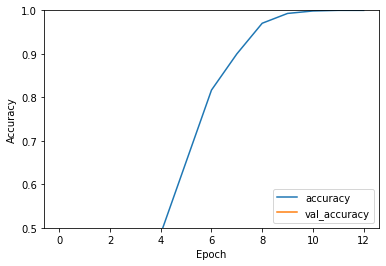

In [ ]:
plt.plot(historyB.history['accuracy'], label='accuracy')
plt.plot(historyB.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

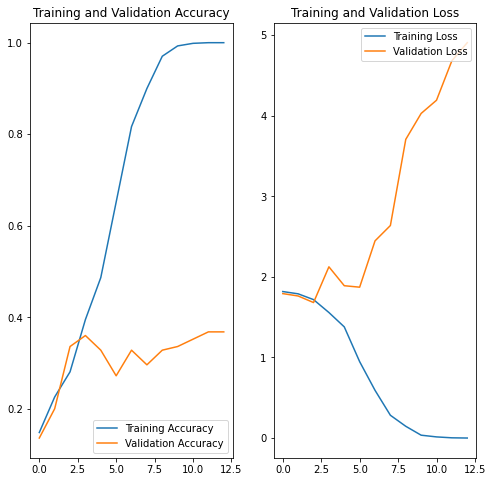

In [ ]:
acc_B = historyB.history['accuracy']
val_acc_B = historyB.history['val_accuracy']

loss_B = historyB.history['loss']
val_loss_B = historyB.history['val_loss']

epochs_range_B = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_B, acc_B, label='Training Accuracy')
plt.plot(epochs_range_B, val_acc_B, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_B, loss_B, label='Training Loss')
plt.plot(epochs_range_B, val_loss_B, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# defining the model C

In [ ]:
# locally connected convolutions feature extractors.
modelC = models.Sequential()
modelC.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 1))) # grayscale, change to 3 for RGB.
modelC.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelC.add(layers.MaxPooling2D((2, 2)))
modelC.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelC.add(layers.MaxPooling2D((2, 2)))
modelC.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully connected layers
modelC.add(layers.Flatten()) # 3D tensor to 1D vector.
modelC.add(layers.Dense(len(train_ds.class_names)))
modelC.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons.
modelC.add(layers.Dense(32, activation='relu')) # hidden layer with fully connect neurons. adding the bottleneck layer to reduce the number of parameters.
modelC.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons.
modelC.add(layers.Dense(len(train_ds.class_names)))
# output layer which indicates the number of classes.

modelC.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 1)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)       

## model compile and build

In [ ]:
modelC.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train and validate model

In [ ]:
epochs=13

historyC = modelC.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/13
23/23 [==============================] - 15s 559ms/step - loss: 1.7945 - accuracy: 0.1439 - val_loss: 1.7924 - val_accuracy: 0.2000
Epoch 2/13
23/23 [==============================] - 15s 554ms/step - loss: 1.7918 - accuracy: 0.1664 - val_loss: 1.7947 - val_accuracy: 0.1360
Epoch 3/13
23/23 [==============================] - 14s 547ms/step - loss: 1.7922 - accuracy: 0.1848 - val_loss: 1.7945 - val_accuracy: 0.1200
Epoch 4/13
23/23 [==============================] - 14s 548ms/step - loss: 1.7901 - accuracy: 0.1650 - val_loss: 1.7998 - val_accuracy: 0.1120
Epoch 5/13
23/23 [==============================] - 14s 545ms/step - loss: 1.7831 - accuracy: 0.1890 - val_loss: 1.7250 - val_accuracy: 0.2720
Epoch 6/13
23/23 [==============================] - 14s 543ms/step - loss: 1.7195 - accuracy: 0.2807 - val_loss: 1.7090 - val_accuracy: 0.2480
Epoch 7/13
23/23 [==============================] - 14s 542ms/step - loss: 1.6483 - accuracy: 0.3188 - val_loss: 1.7300 - val_accuracy: 0.2960

## the graphs

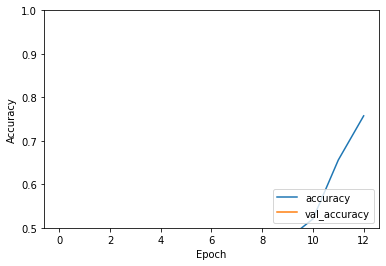

In [ ]:
plt.figure()
plt.plot(historyC.history['accuracy'], label='accuracy')
plt.plot(historyC.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

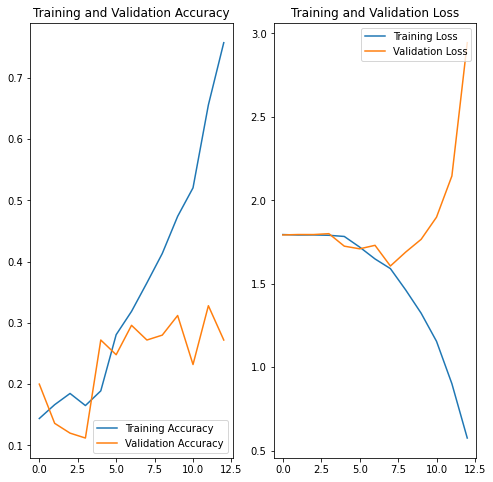

In [ ]:
acc_C = historyC.history['accuracy']
val_acc_C = historyC.history['val_accuracy']

loss_C = historyC.history['loss']
val_loss_C = historyC.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_C, label='Training Accuracy')
plt.plot(epochs_range, val_acc_C, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_C, label='Training Loss')
plt.plot(epochs_range, val_loss_C, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# testing the models

## fetching the testset

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  testset_path,
  label_mode='categorical', # this prevents the data to have sequential order within unlike integer labels.
  shuffle=False,
  seed=123,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# topic to change: aspect ratio

Found 60 files belonging to 6 classes.


## comparison of the results

In [ ]:
#modelA.evaluate(test_ds)

y = np.concatenate([y for x, y in test_ds], axis=0)
x = np.concatenate([x for x, y in test_ds], axis=0)

test_images = x
test_labels = y

test_loss, test_acc = modelA.evaluate(test_images,  test_labels, verbose=1, batch_size=batch_size)
print(f'the loss and accuracy for model A is: test loss= {test_loss}, test acc= {test_acc}')

test_loss, test_acc = modelB.evaluate(test_images,  test_labels, verbose=1, batch_size=batch_size)
print(f'the loss and accuracy for model B is: test loss= {test_loss}, test acc= {test_acc}')

test_loss, test_acc = modelC.evaluate(test_images,  test_labels, verbose=1, batch_size=batch_size)
print(f'the loss and accuracy for model C is: test loss= {test_loss}, test acc= {test_acc}')

2/2 [==============================] - 0s 97ms/step - loss: 5.3638 - accuracy: 0.1667
the loss and accuracy for model A is: test loss= 5.363797187805176, test acc= 0.1666666716337204
2/2 [==============================] - 0s 114ms/step - loss: 5.3271 - accuracy: 0.1833
the loss and accuracy for model B is: test loss= 5.327130317687988, test acc= 0.18333333730697632
2/2 [==============================] - 0s 94ms/step - loss: 2.7169 - accuracy: 0.2667
the loss and accuracy for model C is: test loss= 2.716948986053467, test acc= 0.2666666805744171


## overfitting counter measures

### data augmentation

## Model A

In [ ]:
#For modelA
#We Add 3 layers for augment images by random flipping,random rotation and random zoom the images
# locally connected convolutions feature extractors.
modelA = models.Sequential()
modelA.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 1))) # grayscale, change to 3 for RGB.

#augment
modelA.add(layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)))
modelA.add(layers.RandomRotation(0.1))
modelA.add(layers.RandomZoom(0.1))

modelA.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Conv2D(64, (3, 3), activation='relu'))

layers.Dropout(0.3)
# fully connected layers
modelA.add(layers.Flatten()) # 3D tensor to 1D vector.
modelA.add(layers.Dense(64, activation='relu')) # hidden layer with fully connect neurons.
modelA.add(layers.Dense(len(train_ds.class_names)))
# output layer which indicates the number of classes.

modelA.summary()

modelA.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 100, 100, 1)       0         
                                                                 
 random_flip (RandomFlip)    (None, 100, 100, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 100, 100, 1)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 100, 100, 1)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                  

In [ ]:
epochs=13

historyA = modelA.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/13
23/23 [==============================] - 16s 582ms/step - loss: 1.8042 - accuracy: 0.1608 - val_loss: 1.7931 - val_accuracy: 0.1760
Epoch 2/13
23/23 [==============================] - 15s 574ms/step - loss: 1.7923 - accuracy: 0.1749 - val_loss: 1.7914 - val_accuracy: 0.1440
Epoch 3/13
23/23 [==============================] - 15s 583ms/step - loss: 1.7860 - accuracy: 0.2102 - val_loss: 1.7699 - val_accuracy: 0.2080
Epoch 4/13
23/23 [==============================] - 15s 570ms/step - loss: 1.7902 - accuracy: 0.2158 - val_loss: 1.7682 - val_accuracy: 0.2480
Epoch 5/13
23/23 [==============================] - 15s 572ms/step - loss: 1.7747 - accuracy: 0.2116 - val_loss: 1.7717 - val_accuracy: 0.2400
Epoch 6/13
23/23 [==============================] - 15s 574ms/step - loss: 1.7678 - accuracy: 0.2355 - val_loss: 2.0542 - val_accuracy: 0.2240
Epoch 7/13
23/23 [==============================] - 15s 569ms/step - loss: 1.7736 - accuracy: 0.2468 - val_loss: 1.7870 - val_accuracy: 0.1840

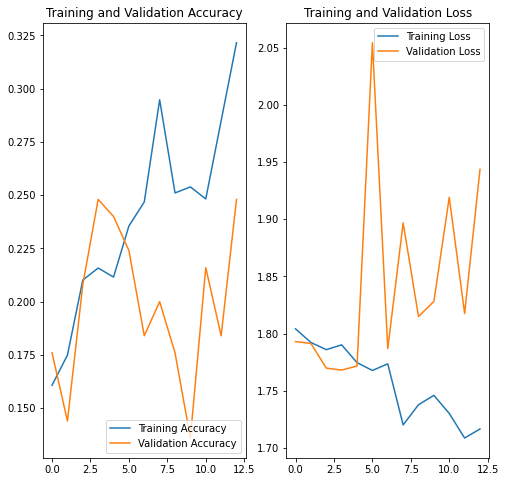

In [ ]:
acc_A = historyA.history['accuracy']
val_acc_A = historyA.history['val_accuracy']

loss_A = historyA.history['loss']
val_loss_A = historyA.history['val_loss']

epochs_range_A = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_A, acc_A, label='Training Accuracy')
plt.plot(epochs_range_A, val_acc_A, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_A, loss_A, label='Training Loss')
plt.plot(epochs_range_A, val_loss_A, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y = np.concatenate([y for x, y in test_ds], axis=0)
x = np.concatenate([x for x, y in test_ds], axis=0)

test_images = x
test_labels = y

test_loss, test_acc = modelA.evaluate(test_images,  test_labels, verbose=1, batch_size=batch_size)
print(f'the loss and accuracy for model A is: test loss= {test_loss}, test acc= {test_acc}')

2/2 [==============================] - 0s 103ms/step - loss: 1.9422 - accuracy: 0.1333
the loss and accuracy for model A is: test loss= 1.9421550035476685, test acc= 0.13333334028720856


## Model B

In [ ]:
#For modelB
#We Add 3 layers for augment images by random flipping,random rotation and random zoom the images
# locally connected convolutions feature extractors.
modelB = models.Sequential()
modelB.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 1))) # grayscale, change to 3 for RGB.

#augment
modelB.add(layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)))
modelB.add(layers.RandomRotation(0.1))
modelB.add(layers.RandomZoom(0.1))

modelB.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((2, 2)))
modelB.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((2, 2)))
modelB.add(layers.Conv2D(64, (3, 3), activation='relu'))

layers.Dropout(0.3)
# fully connected layers
modelB.add(layers.Flatten()) # 3D tensor to 1D vector.
modelB.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons.
modelB.add(layers.Dense(128, activation='relu')) # hidden layer with fully connect neurons.
modelB.add(layers.Dense(len(train_ds.class_names)))
# output layer which indicates the number of classes.

modelB.summary()

modelB.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 100, 100, 1)       0         
                                                                 
 random_flip (RandomFlip)    (None, 100, 100, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 100, 100, 1)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 100, 100, 1)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                  

In [ ]:
epochs=13

historyB = modelB.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/13
23/23 [==============================] - 16s 582ms/step - loss: 1.8042 - accuracy: 0.1608 - val_loss: 1.7931 - val_accuracy: 0.1760
Epoch 2/13
23/23 [==============================] - 15s 574ms/step - loss: 1.7923 - accuracy: 0.1749 - val_loss: 1.7914 - val_accuracy: 0.1440
Epoch 3/13
23/23 [==============================] - 15s 583ms/step - loss: 1.7860 - accuracy: 0.2102 - val_loss: 1.7699 - val_accuracy: 0.2080
Epoch 4/13
23/23 [==============================] - 15s 570ms/step - loss: 1.7902 - accuracy: 0.2158 - val_loss: 1.7682 - val_accuracy: 0.2480
Epoch 5/13
23/23 [==============================] - 15s 572ms/step - loss: 1.7747 - accuracy: 0.2116 - val_loss: 1.7717 - val_accuracy: 0.2400
Epoch 6/13
23/23 [==============================] - 15s 574ms/step - loss: 1.7678 - accuracy: 0.2355 - val_loss: 2.0542 - val_accuracy: 0.2240
Epoch 7/13
23/23 [==============================] - 15s 569ms/step - loss: 1.7736 - accuracy: 0.2468 - val_loss: 1.7870 - val_accuracy: 0.1840

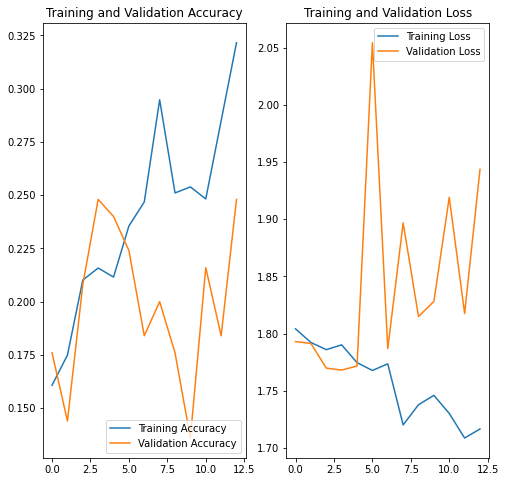

In [ ]:
acc_B = historyB.history['accuracy']
val_acc_B = historyB.history['val_accuracy']

loss_B = historyB.history['loss']
val_loss_B = historyB.history['val_loss']

epochs_range_B = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_B, acc_B, label='Training Accuracy')
plt.plot(epochs_range_B, val_acc_B, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_B, loss_B, label='Training Loss')
plt.plot(epochs_range_B, val_loss_B, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y = np.concatenate([y for x, y in test_ds], axis=0)
x = np.concatenate([x for x, y in test_ds], axis=0)

test_images = x
test_labels = y

test_loss, test_acc = modelA.evaluate(test_images,  test_labels, verbose=1, batch_size=batch_size)
print(f'the loss and accuracy for model A is: test loss= {test_loss}, test acc= {test_acc}')

2/2 [==============================] - 0s 103ms/step - loss: 1.9422 - accuracy: 0.1333
the loss and accuracy for model A is: test loss= 1.9421550035476685, test acc= 0.13333334028720856
